In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df=pd.read_csv('gurgaon_properties_oulier_treatment.csv')

In [5]:
df.shape

(3706, 24)

In [6]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1078
agePossession             0
super_built_up_area    1814
built_up_area          2009
carpet_area            1811
study room                0
servant room              0
pooja room                0
store room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [7]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,Sector 36 Sohna,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3.0,2,2,2.0,NaN,new property,1081.0,NaN,650.0,0,0,0,0,0,1,8,360.333333
1,flat,smart world gems,Sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2.0,2,2,4.0,NaN,new property,NaN,NaN,1103.0,1,1,0,0,0,1,38,552.500000
2,flat,breez global hill view,Sohna,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2.0,2,1,17.0,NaN,new property,NaN,1000.0,585.0,0,0,0,0,0,1,49,292.500000
3,flat,bestech park view sanskruti,Sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3.0,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,2,174,665.000000
4,flat,suncity avenue,Sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2.0,2,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0,0,0,1,0,1,159,266.000000


# built_up_area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

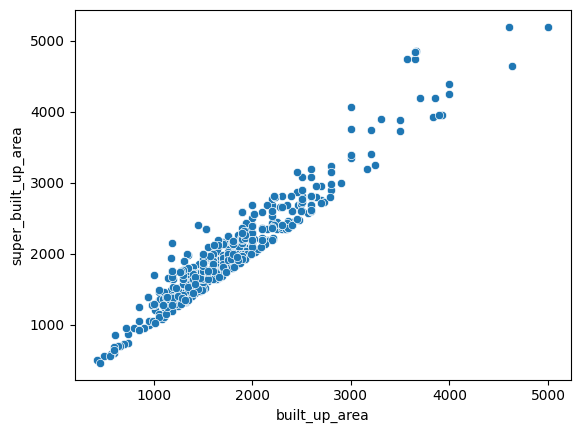

In [8]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='carpet_area', ylabel='built_up_area'>

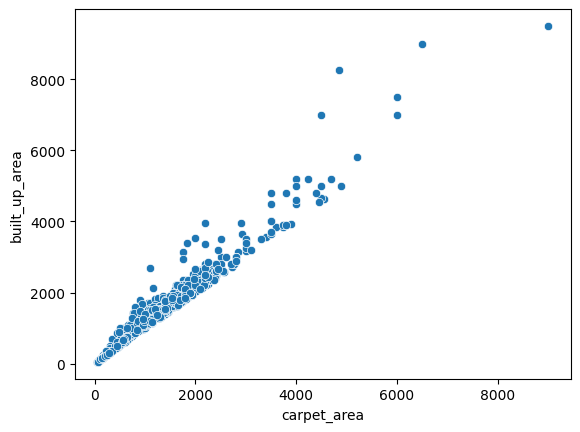

In [9]:
sns.scatterplot(x=df['carpet_area'],y=df['built_up_area'])

In [10]:
(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())

0       False
1       False
2       False
3       False
4       False
        ...  
3701    False
3702    False
3703    False
3704    False
3705    False
Length: 3706, dtype: bool

In [11]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [12]:
all_present_df.shape

(533, 24)

In [13]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [14]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [15]:
super_to_built_up_ratio, carpet_to_built_up_ratio

(np.float64(1.105263157894737), np.float64(0.9))

In [16]:
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [17]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,Sector 36 Sohna,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3.0,2,2,2.0,NaN,new property,1081.0,NaN,650.0,0,0,0,0,0,1,8,360.333333
4,flat,suncity avenue,Sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2.0,2,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0,0,0,1,0,1,159,266.000000
40,flat,corona optus,Sector 37C,1.25,7176.0,1742.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3.0,3,3,2.0,North-West,Relatively New,1735.0,NaN,1400.0,1,0,0,0,0,1,49,580.666667
42,flat,m3m merlin,Sector 67,2.80,13679.0,2047.0,Super Built up area 2047(190.17 sq.m.)Carpet a...,3.0,3,3,5.0,North-East,Moderately Old,2047.0,NaN,1880.0,0,1,0,0,0,0,26,682.333333
47,flat,smart world orchard,Sector 61,2.10,13752.0,1527.0,Super Built up area 1549(143.91 sq.m.)Carpet a...,3.0,2,3,3.0,South,Under Construction,1549.0,NaN,1500.0,0,0,0,0,0,1,146,509.000000


In [18]:
sb_df['built_up_area'].fillna(round(((sb_df['super_built_up_area']/1.105) + (sb_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_2704\633531018.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(((sb_df['super_built_up_area']/1.105) + (sb_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_2704\633531018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [19]:
df.update(sb_df)

In [20]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1078
agePossession             0
super_built_up_area    1814
built_up_area          1585
carpet_area            1811
study room                0
servant room              0
pooja room                0
store room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [21]:
sp_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [22]:
sp_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score,area_room_ratio
5,flat,paras quartier,Gwal Pahari,7.50,14019.0,5350.0,Super Built up area 5350(497.03 sq.m.),4.0,4,3+,20.0,North-East,new property,5350.0,NaN,NaN,0,1,1,0,1,2,49,1337.500000
6,flat,experion the heartsong,Sector 108,2.00,8554.0,2338.0,Super Built up area 2338(217.21 sq.m.),3.0,3,3+,14.0,East,Relatively New,2338.0,NaN,NaN,0,1,0,0,0,1,95,779.333333
7,flat,adani m2k oyster grande,Sector 102,1.90,9104.0,2087.0,Super Built up area 1889(175.49 sq.m.),3.0,4,3,8.0,North-East,Relatively New,1889.0,NaN,NaN,0,1,0,0,0,1,165,695.666667
13,flat,ats tourmaline,Sector 109,2.25,8704.0,2585.0,Super Built up area 2585(240.15 sq.m.),3.0,4,3,14.0,North-East,Relatively New,2585.0,NaN,NaN,0,1,0,0,0,1,101,861.666667
16,flat,bestech park view sanskruti,Sector 92,1.55,7568.0,2048.0,Super Built up area 1995(185.34 sq.m.),3.0,4,3,16.0,South,Relatively New,1995.0,NaN,NaN,0,1,0,0,0,2,60,682.666667


In [23]:
sp_df['built_up_area'].fillna(round(sp_df['super_built_up_area']/1.105),inplace=True)

C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_2704\365928041.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sp_df['built_up_area'].fillna(round(sp_df['super_built_up_area']/1.105),inplace=True)
C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_2704\365928041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_df['built_up_area'

In [24]:
df.update(sp_df)

In [25]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1078
agePossession             0
super_built_up_area    1814
built_up_area           699
carpet_area            1811
study room                0
servant room              0
pooja room                0
store room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [26]:
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [27]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,smart world gems,Sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2.0,2,2,4.0,NaN,new property,NaN,NaN,1103.0,1,1,0,0,0,1,38,552.50
10,flat,floor type society,Near Pataudi Chowk,0.40,6667.0,600.0,Carpet area: 600 (55.74 sq.m.),2.0,2,1,1.0,East,Relatively New,NaN,NaN,600.0,0,0,0,0,0,1,7,300.00
12,flat,dlf regency park,DLF Phase 4,1.60,14545.0,1100.0,Carpet area: 1100 (102.19 sq.m.),2.0,2,2,3.0,North,Relatively New,NaN,NaN,1100.0,0,0,0,0,0,1,52,550.00
14,flat,emaar mgf emerald floors premier,Sector 65,2.77,14025.0,1975.0,Carpet area: 1975 (183.48 sq.m.),4.0,4,3+,3.0,North-East,Relatively New,NaN,NaN,1975.0,1,1,0,0,0,0,174,493.75
20,flat,afnhb jalvayu vihar,Sector 30,0.85,12859.0,661.0,Carpet area: 661 (61.41 sq.m.),2.0,2,1,2.0,West,Old Property,NaN,NaN,661.0,0,0,0,0,1,2,49,330.50


In [28]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_2704\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_2704\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(ro

In [29]:
df.update(c_df)

In [30]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1078
agePossession             0
super_built_up_area    1814
built_up_area             0
carpet_area            1811
study room                0
servant room              0
pooja room                0
store room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

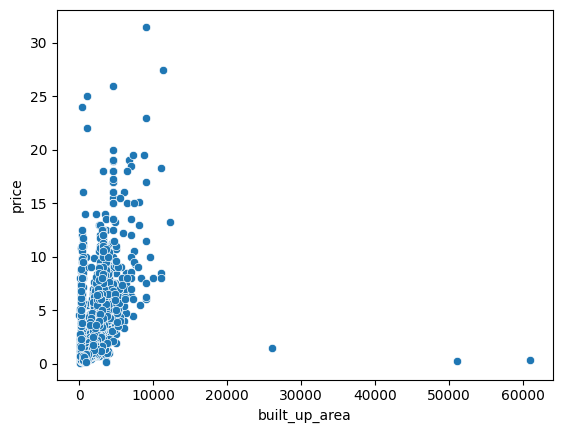

In [31]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])


In [32]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [33]:
anamoly_df.sample(5)

,price,area,built_up_area
1577,6.4,2592.0,240.0
1345,9.0,1565.0,1565.0
401,6.5,1800.0,1800.0
1194,3.6,1728.0,1728.0
841,3.8,2164.0,1700.0


In [34]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

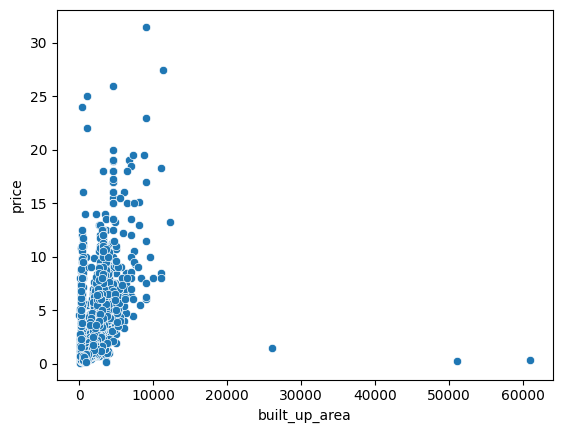

In [35]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [36]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [37]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score
0,flat,signature global park 4,Sector 36 Sohna,0.82,7586.0,3.0,2,2,2.0,NaN,new property,850.0,0,0,0,0,0,1,8
1,flat,smart world gems,Sector 89,0.95,8597.0,2.0,2,2,4.0,NaN,new property,1226.0,1,1,0,0,0,1,38
2,flat,breez global hill view,Sohna,0.32,5470.0,2.0,2,1,17.0,NaN,new property,1000.0,0,0,0,0,0,1,49
3,flat,bestech park view sanskruti,Sector 92,1.60,8020.0,3.0,4,3+,10.0,North-West,Relatively New,1615.0,0,1,0,0,1,2,174
4,flat,suncity avenue,Sector 102,0.48,9023.0,2.0,2,1,5.0,North-East,Relatively New,582.0,0,0,0,1,0,1,159


In [38]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             19
facing             1078
agePossession         0
built_up_area         0
study room            0
servant room          0
pooja room            0
store room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

# facing

In [39]:
df.drop(columns=['facing'],inplace=True)

df.head()

In [40]:
df.isnull().sum()

property_type       0
society             1
sector              0
price               0
price_per_sqft      0
bedRoom             0
bathroom            0
balcony             0
floorNum           19
agePossession       0
built_up_area       0
study room          0
servant room        0
pooja room          0
store room          0
others              0
furnishing_type     0
luxury_score        0
dtype: int64

# floor num


df[df['floorNum'].isnull()]

In [41]:
df[df['property_type'] == 'house']['floorNum'].median()

np.float64(2.0)

In [42]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\Kishlay Kumar\AppData\Local\Temp\ipykernel_2704\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [43]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
pooja room         0
store room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

# age possession

In [44]:
df['agePossession'].value_counts()


agePossession
Relatively New        1634
Moderately Old         578
new property           576
Old Property           333
Undefined              316
Under Construction     268
undefined                1
Name: count, dtype: int64

In [45]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score
11,house,independent,Sector 109,1.55,6568.0,3.0,2,0,1.0,Undefined,2360.0,0,0,0,0,0,1,0
34,house,greenopolis,Sector 89,0.70,5397.0,2.0,2,2,14.0,Undefined,1297.0,0,0,0,0,0,1,0
50,flat,smart world gems,Sector 89,1.71,12000.0,3.0,2,0,3.0,Undefined,1423.0,0,0,0,0,0,1,45
72,flat,rof aalayas,Sector 102,0.45,6000.0,1.0,1,2,6.0,Undefined,750.0,0,0,0,0,0,1,0
76,house,bhim garh kheri,Sector 3,1.50,7576.0,7.0,2,0,1.0,Undefined,1980.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,flat,jmd empire,Golf Course Road,1.50,12500.0,2.0,2,3,7.0,Undefined,1200.0,0,0,0,0,0,1,0
3656,house,independent,Surya Vihar,0.45,8411.0,3.0,2,1,1.0,Undefined,594.0,0,0,0,0,0,1,0
3669,flat,sidhartha ncr one,Sector 95,0.57,4179.0,2.0,2,2,10.0,Undefined,1364.0,0,0,0,0,0,1,0
3674,house,independent,Hira Nagar,1.05,9722.0,3.0,2,0,1.0,Undefined,1080.0,0,0,0,0,0,1,0


In [46]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
       
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [47]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [48]:
df['agePossession'].value_counts()

agePossession
Relatively New        1766
Moderately Old         621
new property           595
Old Property           356
Under Construction     281
Undefined               86
undefined                1
Name: count, dtype: int64

In [49]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [50]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [51]:
df['agePossession'].value_counts()

agePossession
Relatively New        1778
Moderately Old         626
new property           597
Old Property           357
Under Construction     282
Undefined               65
undefined                1
Name: count, dtype: int64

In [52]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [53]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [54]:
df['agePossession'].value_counts()

agePossession
Relatively New        1794
Moderately Old         675
new property           597
Old Property           357
Under Construction     282
undefined                1
Name: count, dtype: int64

In [55]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
pooja room         0
store room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [56]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score
2642,flat,NaN,Sector 78,0.6,3692.0,2.0,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,1,0


In [57]:
df.drop(index=[2642],inplace=True)


In [58]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
pooja room         0
store room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [61]:
df.to_csv('gurgaon_properties_missing_value.csv',index=False)